<a href="https://colab.research.google.com/github/staceyland/Trading_Feb_Mar_2021/blob/main/Trades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I am going to analyze my trades from Febuary - March. Let's set up the notebook and import the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
Trades_raw = pd.read_csv('/content/Trades_feb-mar.csv')

Let's take a look at the data. We have the markets traded, the date/times, entries, lot size and the total profit. 


In [9]:
Trades_raw.head()

,Close_Date,Symbol,Asset,Action,Profit_loss,Size,Point_Value,Entry_Date,Entry_Time,Entry_Price,Exit_Date,Exit_Time,Exit_Price,Notes,Unnamed: 14
0,3/30/2021,ESM21,Futures,Sell,900.00,1.0,50.0,3/29/2021,NaN,3964.00000,3/30/2021,NaN,3946.00000,NaN,NaN
1,3/24/2021,AUDUSD,Forex,Buy,-48.96,18000.0,1.0,3/24/2021,NaN,0.76064,3/24/2021,NaN,0.75792,NaN,NaN
2,3/23/2021,M2KM21,Futures,Buy,-277.50,3.0,5.0,3/23/2021,NaN,2255.80000,3/23/2021,NaN,2237.30000,NaN,NaN
3,3/22/2021,6BJ21,Futures,Buy,337.50,3.0,62500.0,3/22/2021,NaN,1.38250,3/22/2021,NaN,1.38430,NaN,NaN
4,3/22/2021,ESM21,Futures,Buy,925.00,1.0,50.0,3/22/2021,NaN,3888.75000,3/22/2021,NaN,3907.25000,NaN,NaN


I'll clean up the data by removing the columns I don't need and view the remaining columns. 

In [10]:
Trades = Trades_raw.drop(['Unnamed: 14', 'Notes'], axis=1)

In [ ]:
Trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close_Date   54 non-null     object 
 1   Symbol       54 non-null     object 
 2   Asset        54 non-null     object 
 3   Action       54 non-null     object 
 4   Profit_loss  54 non-null     float64
 5   Size         53 non-null     float64
 6   Point_Value  53 non-null     float64
 7   Entry_Date   53 non-null     object 
 8   Entry_Time   24 non-null     object 
 9   Entry_Price  53 non-null     float64
 10  Exit_Date    53 non-null     object 
 11  Exit_Time    24 non-null     object 
 12  Exit_Price   53 non-null     float64
dtypes: float64(5), object(8)
memory usage: 5.6+ KB


In [11]:
Trades.head()

,Close_Date,Symbol,Asset,Action,Profit_loss,Size,Point_Value,Entry_Date,Entry_Time,Entry_Price,Exit_Date,Exit_Time,Exit_Price
0,3/30/2021,ESM21,Futures,Sell,900.00,1.0,50.0,3/29/2021,NaN,3964.00000,3/30/2021,NaN,3946.00000
1,3/24/2021,AUDUSD,Forex,Buy,-48.96,18000.0,1.0,3/24/2021,NaN,0.76064,3/24/2021,NaN,0.75792
2,3/23/2021,M2KM21,Futures,Buy,-277.50,3.0,5.0,3/23/2021,NaN,2255.80000,3/23/2021,NaN,2237.30000
3,3/22/2021,6BJ21,Futures,Buy,337.50,3.0,62500.0,3/22/2021,NaN,1.38250,3/22/2021,NaN,1.38430
4,3/22/2021,ESM21,Futures,Buy,925.00,1.0,50.0,3/22/2021,NaN,3888.75000,3/22/2021,NaN,3907.25000


There are 54 trades. There are 43 futures trades and 11 forex trades. I went long on most of my trades. It must have been a bull market.

In [12]:
Trades.shape[0]

54

In [15]:
Trades['Asset'].value_counts()

Futures    43
Forex      11
Name: Asset, dtype: int64

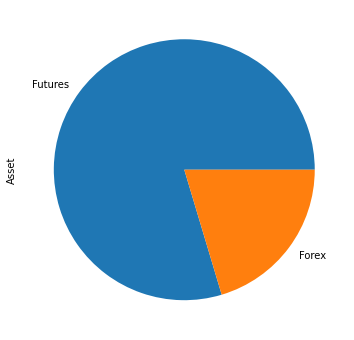

In [16]:
Trades['Asset'].value_counts().plot(kind='pie', figsize=(6,6))

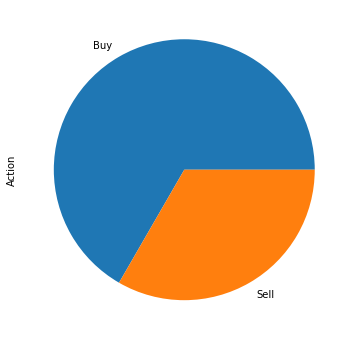

In [17]:
Trades['Action'].value_counts().plot(kind='pie', figsize=(6,6))

Let's see which contracts I traded most often. Looks like the Micro E-mini Nasdaq-100 was most popular followed by the Canadian dollar futures, Platinum, and the Pound Aussie spot.

In [25]:
Trades['Symbol'].value_counts()

MNQH21    5
GBPAUD    3
PLH21     3
6CH21     3
EURAUD    2
RTYH21    2
ESM21     2
6BM21     2
6AH21     2
ZFM21     2
USDJPY    1
6BJ21     1
ZNM21     1
MESH21    1
6BH21     1
ZFH21     1
GCH21     1
MYMH21    1
PLJ21     1
GBPCHF    1
EURUSD    1
SIK21     1
6NH21     1
NQJ21     1
EURJPY    1
HGK21     1
ZBM21     1
MNQM21    1
AUDCAD    1
CLJ21     1
AUDUSD    1
HOJ21     1
EURNZD    1
NQM21     1
SIH21     1
6CJ21     1
ESH21     1
M2KM21    1
Name: Symbol, dtype: int64

Let's check out my profits and losses based on each symbol. I aim to keep a stop loss of $300 or less and aim for profits of at least 3:1. For the most part I remained consistent to my trade plan.

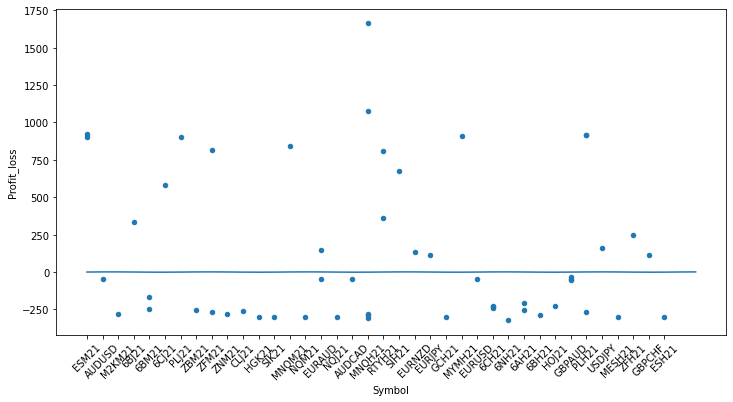

In [19]:
Trades.plot(kind='scatter', x='Symbol', y='Profit_loss', figsize=(12,6))
x = np.arange(0, 40, 1)
y = np.sin(x)
plt.plot(x, y)
plt.xticks(rotation = 45)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


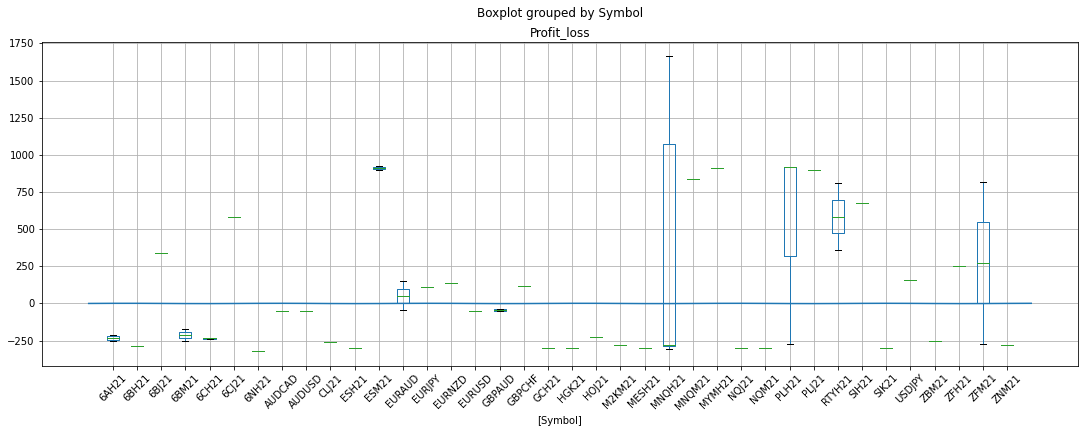

In [26]:
Trades[['Profit_loss', 'Symbol']].boxplot(by='Symbol', figsize=(18,6))
x = np.arange(0, 40, 1)
y = np.sin(x)
plt.plot(x, y)
plt.xticks(rotation = 45)
plt.show()

Let's take a look at my profitable trades. 

In [27]:
Trades_profit = Trades.loc[(Trades['Profit_loss'] >= 0)]
Trades_profit

,Close_Date,Symbol,Asset,Action,Profit_loss,Size,Point_Value,Entry_Date,Entry_Time,Entry_Price,Exit_Date,Exit_Time,Exit_Price
0,3/30/2021,ESM21,Futures,Sell,900.000000,1.0,50.000000,3/29/2021,NaN,3964.00000,3/30/2021,NaN,3946.00000
3,3/22/2021,6BJ21,Futures,Buy,337.500000,3.0,62500.000000,3/22/2021,NaN,1.38250,3/22/2021,NaN,1.38430
4,3/22/2021,ESM21,Futures,Buy,925.000000,1.0,50.000000,3/22/2021,NaN,3888.75000,3/22/2021,NaN,3907.25000
7,3/17/2021,6CJ21,Futures,Buy,585.000000,1.0,100000.000000,3/17/2021,NaN,0.80105,3/17/2021,NaN,0.80690
8,3/17/2021,PLJ21,Futures,Buy,900.000000,3.0,50.000000,3/17/2021,NaN,1190.00000,3/17/2021,NaN,1196.00000
15,3/15/2021,MNQM21,Futures,Sell,840.000000,7.0,2.000000,3/15/2021,10:45 AM,12959.25000,3/15/2021,11:25 AM,12899.25000
17,3/15/2021,EURAUD,Forex,Sell,149.243704,83000.0,0.771724,3/15/2021,NaN,1.54555,3/15/2021,NaN,1.54322
19,3/15/2021,ZFM21,Futures,Buy,818.400000,12.0,1000.000000,3/15/2021,NaN,123.70000,3/15/2021,NaN,123.76820
22,3/8/2021,RTYH21,Futures,Sell,360.000000,1.0,50.000000,3/8/2021,NaN,2231.30000,3/8/2021,NaN,2224.10000
23,3/3/2021,MNQH21,Futures,Buy,1074.500000,7.0,2.000000,3/3/2021,10:15 AM,12965.25000,3/3/2021,10:30 AM,13042.00000


In [28]:
Trades_profit.shape[0]

21

In [29]:
Trades_profit['Profit_loss'].mean()

645.2746130666667

I had 21 winning trades with an average profit of $645. Now let's look at the losers.

In [31]:
Trades_loss = Trades.loc[(Trades['Profit_loss'] < 0)]
Trades_loss

,Close_Date,Symbol,Asset,Action,Profit_loss,Size,Point_Value,Entry_Date,Entry_Time,Entry_Price,Exit_Date,Exit_Time,Exit_Price
1,3/24/2021,AUDUSD,Forex,Buy,-48.960000,18000.0,1.00000,3/24/2021,NaN,0.76064,3/24/2021,NaN,0.75792
2,3/23/2021,M2KM21,Futures,Buy,-277.500000,3.0,5.00000,3/23/2021,NaN,2255.80000,3/23/2021,NaN,2237.30000
5,3/17/2021,6BM21,Futures,Sell,-250.000000,4.0,62500.00000,3/17/2021,NaN,1.39440,3/17/2021,NaN,1.39540
6,3/17/2021,6BM21,Futures,Sell,-168.750000,9.0,62500.00000,3/17/2021,NaN,1.39370,3/17/2021,NaN,1.39400
9,3/17/2021,ZBM21,Futures,Buy,-252.500000,2.0,1000.00000,3/17/2021,NaN,155.65625,3/17/2021,NaN,155.53000
10,3/17/2021,ZFM21,Futures,Sell,-270.000000,6.0,1000.00000,3/17/2021,NaN,123.94500,3/17/2021,NaN,123.99000
11,3/17/2021,ZNM21,Futures,Buy,-281.250000,3.0,1000.00000,3/17/2021,NaN,131.84375,3/17/2021,NaN,131.75000
12,3/16/2021,CLJ21,Futures,Buy,-260.000000,2.0,1000.00000,3/16/2021,NaN,63.96000,3/16/2021,NaN,63.83000
13,3/16/2021,HGK21,Futures,Buy,-300.000000,2.0,25000.00000,3/16/2021,NaN,4.08050,3/16/2021,NaN,4.07450
14,3/16/2021,SIK21,Futures,Buy,-300.000000,1.0,5000.00000,3/16/2021,NaN,26.01500,3/16/2021,NaN,25.95500


In [32]:
Trades_loss.shape[0]

33

In [33]:
Trades_loss['Profit_loss'].mean()

-222.17985932424244

In [23]:
import math
x = 645
y = 222
div = math.gcd(x, y)
x/y

2.9054054054054053

I had 33 losing trades for an average loss of $222. The ratio of profits to losses is 2.9, just shy of my 3:1 goal.

I won 39% of my trades, which is above my target of 3:1, or 33%. 

In [35]:
def percentage(part, whole):
  percentage = 100 * float(part)/float(whole)
  return str(percentage) + "%"

print(percentage(21, 54))

38.888888888888886%


My most profitable trade was the Micro E-mini Nasdaq-100 on February 25, making $1662.

In [34]:
cond = Trades['Profit_loss'] == Trades['Profit_loss'].max()

Trades.loc[cond]

,Close_Date,Symbol,Asset,Action,Profit_loss,Size,Point_Value,Entry_Date,Entry_Time,Entry_Price,Exit_Date,Exit_Time,Exit_Price
38,2/25/2021,MNQH21,Futures,Sell,1662.0,4.0,2.0,2/25/2021,12:00 PM,13140.25,2/25/2021,1:30 PM,12932.5


My least profitable trade was the New Zealand dollar on February 25, losing $320.

In [36]:
cond = Trades['Profit_loss'] == Trades['Profit_loss'].min()

Trades.loc[cond]

,Close_Date,Symbol,Asset,Action,Profit_loss,Size,Point_Value,Entry_Date,Entry_Time,Entry_Price,Exit_Date,Exit_Time,Exit_Price
34,2/25/2021,6NH21,Futures,Buy,-320.0,2.0,100000.0,2/25/2021,2:30 PM,0.7377,2/25/2021,4:30 PM,0.7361


Even though I had more losers than winners, I was still able to profit 6219. This is achieved by keeping my losers small, and letting the winners run. I need to be more diligent in maintaining stop losses of $300 or less.  

In [ ]:
Total_profits = Trades['Profit_loss'].sum()
Total_profits

6218.831516699999

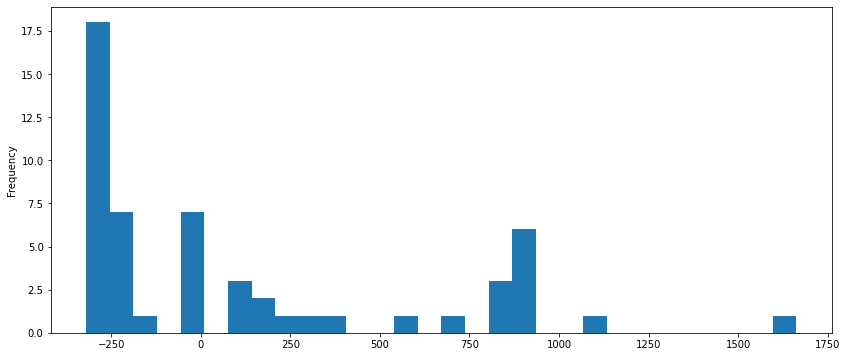

In [24]:
Trades['Profit_loss'].plot(kind='hist', bins=30, figsize=(14,6))

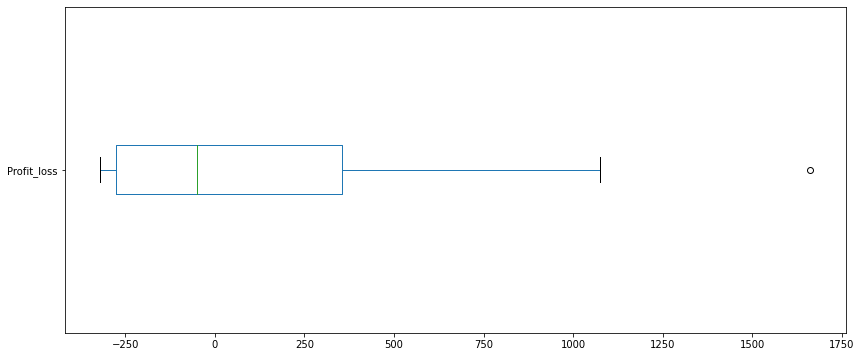

In [ ]:
Trades['Profit_loss'].plot(kind='box', vert=False, figsize=(14,6))

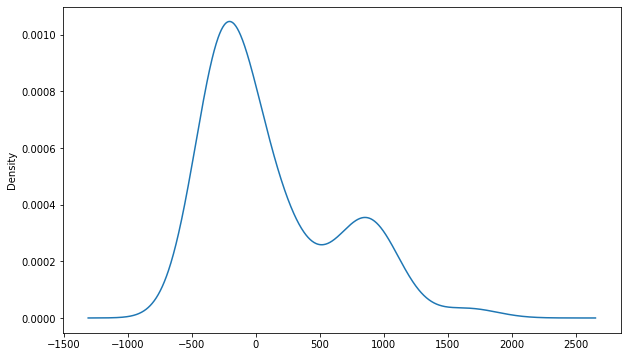

In [ ]:
Trades['Profit_loss'].plot(kind='kde', figsize=(10,6))